# Integração
<div class="alert alert-block alert-success">
    <b>Notas de aula baseadas no livro: </b> 
    <p>Cálculo Numérico, da autora Márcia Ruggiero 
</div>

Seja uma função $f(x)$ integrável no intervalo $[a,b]$, então 

$$\int_a^b f(x) dx = F(b) - F(a), \mathsf{~onde~} F'(x)=f(x).$$

<img src="img/Picture32.png" width="50%" height="50%">

Quando a forma analítica de $F(x)$ for de difícil obtenção ou se forem conhecidos somente valores discretos de $f(x)$, se faz necessário o uso de métodos numéricos para avaliar a integral de $f(x)$. 

<img src="img/Picture33.png" width="50%" height="50%">

Em engenharia e ciências as principais aplicações referem-se à analogia entre integração e soma. Necessária para determinar a média de funções contínuas e discretas, respectivamente. 

Essa fórmula tem inúmeras aplicações em engenharia. Por exemplo, é usada para calcular o centro de gravidade de objetos irregulares em engenharia mecânica e civil. 

Outros exemplos podem ser vistos na figura abaixo.

<img src="img/Picture34.png" width="50%" height="50%">

Esse métodos consistem em aproximar a função $f(x)$ por um polinômio interpolador e determinar analiticamente a integral desse polinômio no intervalo $[a,b]$.

Abordaremos duas classes de métodos: as fórmulas de Newton-Cotes e a quadratura de Gauss-Legrende. 

## 1. Fórmulas de Newton-Cotes
Assume-se que o valor da função $f$, definida entre $[a, b]$ é conhecido, em pontos $x_i$ entre $i = 0, \dots, n$ igualmente espaçados, onde $x_0 = a$ e $x_n = b$.  

A fórmula de Newton-Cotes, de grau $n$ é definida como:
$$\int_a^b f(x) \,dx \approx \sum_{i=0}^n w_i\, f(x_i)$$

onde $w_i$ são chamados de pesos. $x_i = i \cdot h + x_0$, com $h$ (tamanho do passo) igual a $\dfrac{x_n - x_0}{n} = \dfrac{b-a}{n}$.

Uma fórmula de Newton-Cotes de qualquer grau $n$ pode ser construída. Porém, para valores elevados de $n$, a regra de Newton-Cotes pode sofrer do [Fenômeno de Runge](https://pt.wikipedia.org/wiki/Fórmulas_de_Newton-Cotes), onde erros aumentam exponencialmente a medida que $n$ cresce.

Nas fórmulas de Newton-Cotes a ideia é apresentar um polinômio interpolador $p_n(x)$ que passe pelos pontos $(x_i,f(x_i))$ que aproxime razoavelmente o valor de $f(x)$ no intervalo $[a,b]$. 

Quando fixamos o valor de $n=1$, temos a regra do Trapézio, $n=2$ representa a regra de 1/3 Simpson, já $n=3$ conduz a regra 3/8 de Simpson. 

### 1.1. Exercício

- Calcule a integral definida analiticamente $I = \int_0^{0.8} (0.2 + 25x -200x^2 + 675x^3 - 900x^4 + 400x^5)dx$. 

Resposta: $I = 1.6405333$

In [16]:
format long;
f = @(x) 0.2 + 25.*x - 200.*x.^2 + 675.*x.^3 - 900.*x.^4 + 400.*x.^5;
F = @(x) 0.2*x + 25*x^2/2 - 200*x^3/3 + 675*x^4/4 - 900*x^5/5 + 400*x^6/6;
I = F(0.8)-F(0)

I =  1.64053333333333


## 2. Regra do Trapézio
Se utilizarmos a forma de Lagrange para expressar o polinômio que interpola $f(x)$ em $x_0$ e $x_1$ temos:
$$\int_a^b f(x) dx \approx \int_{a=x_0}^{b=x_1} p_1(x)dx =\int_{x_0}^{x_1} f(x_0) \frac {x-x_1}{-h} + f(x_1) \frac {x-x_0}{h}dx = I_{T}.$$

Considerando a mudança de variáveis $u = \dfrac{x-x_0}{h}$, temos:
$$I_{T} = \int_{x_0}^{x_1} [f(x_0) (1-u) + f(x_1) u ] h du = \frac{h}{2}[f(x_0) + f(x_1)].$$

Graficamente,

<img src="img/Trapezio.png" width="50%" height="50%">

Subdividindo o intervalo $[a,b]$ em $m$ subintervalos iguais e aplicando a equação $I_T$ a cada subintervalo $[x_i,x_{i+1}]$, com $i=0,\dots,m-1$, temos:

$$\int_{x_0}^{x_m} f(x) dx \approx \sum_{i=0}^{m-1} \int_{x_i}^{x_{i+1}} p_1(x) dx = \frac{h}{2}[f(x_0)+f(x_1))] + \frac{h}{2}[f(x_1)+f(x_2)] + \cdots + \frac{h}{2}[f(x_{m-1})+f(x_m)],$$

e portanto,

$$I_{TR} = \frac{h}{2}[f(x_0)+2f(x_1) + \cdots + 2f(x_{m-1})+ f(x_m))].$$

### 2.1. Exercício

- Calcule numericamente a integral definida $I = \int_0^{0.8} (0.2 + 25x -200x^2 + 675x^3 - 900x^4 + 400x^5)dx$ pela regra do trapézio com $m=1,3$. 



In [13]:
a = 0; b = 0.8;
h = (b - a);
I1 = (h/2)*(f(a)+f(b))
100*(I - I1)/I
h = (b - a)/3
I3 = (h/2)*(f(a) + 2*f(a+h) + 2*f(a+2*h) + f(b))
100*(I - I3)/I

I1 =  0.172800000000022
ans =  89.4668400520142
h =  0.266666666666667
I3 =  1.36957366255145
ans =  16.5165599062429


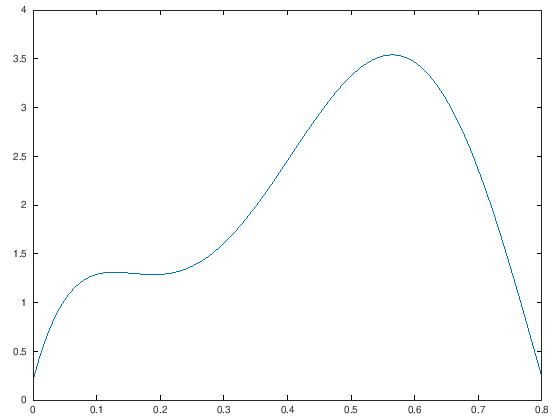

In [19]:
x = linspace(0,0.8);
plot(x, f(x))

## 3. Regra 1/3 de Simpson
Assumindo agora a aproximação de $f(x)$ é dada pelo polinômio interpolador de grau 2 que passa por $x_0$, $x_1$ e $x_2$, temos:
$$\int_a^b f(x) dx \approx \int_{x_0}^{x_2} p_2(x)dx =\int_{x_0}^{x_2} [f(x_0) \frac {(x-x_1)(x-x_2)}{2h^2} + f(x_1) \frac {(x-x_0)(x-x_2)}{-h^2} + f(x_2) \frac{(x-x_0)(x-x_1)}{2h^2}]dx = I_{S}.$$

Fazendo a mesma troca de variáveis $u = \frac{x-x_0}{h}$, temos:
$$I_S = \int_{x_0}^{x_2} \Big(f(x_0)[\frac{(u-1)(u-2)}{2}] - f(x_1)u(u-2) + f(x_2)[\frac{u(u-1)}{2}]\Big) h du = \frac{h}{3}[f(x_0) + 4f(x_1) + f(x_2)].$$

Analogamente, tomando uma quantidade par de $m$ subintervalos, temos:
\begin{eqnarray}
\nonumber \int_{x_0}^{x_m} f(x) dx \approx \sum_{i=0}^{\frac{m}{2}}\int_{x_{2i}}^{x_{2i+2}} p_2(x)dx = \frac{h}{3} \Big[f(x_0) + 4f(x_1)+f(x_2)\Big] + \frac{h}{3} \Big[f(x_2) + 4f(x_3)+f(x_4)\Big] + \cdots \\
\nonumber +\frac{h}{3} \Big[f(x_{m-2}) + 4f(x_{m-1})+f(x_m)\Big],
\end{eqnarray}

e portanto,

$$I_{SR} = \frac{h}{3}\Big[f(x_0)+ f(x_m) + 4(f(x_1) + f(x_3) + \cdots + f(m-1)) + 2(f(x_2) + f(x_4) +\cdots+ f(x_{m-2}))\Big].$$


### 3.1. Exemplo: Dado $I=\int_0^1 e^x dx$, determine:
<br>a) Uma aproximação para $I$ utilizando a regra dos trapézios
utilizando 10 subintervalos.
<br>b) Uma aproximação para $I$ utilizando a regra 1/3 de Simpson com 
$m=4$.
<br>c) Compare os resultados obtidos nos itens a e b. 


**Solução:**

a) $h=\frac{b-a}{m} = \frac{1-0}{10} = 0.1$

$I_{TR} = \frac{h}{2}[f(x_0) + f(x_{10}) + 2(f(x_1)+f(x_2)+ \dots + f(x_9))]$

$= \frac{0.1}{2}[e^0 + e^1 + 2(e^{0.1}+e^{0.2}+ \dots + e^{0.9})]=$

$ = 1.71971349$


b) $h=\frac{b-a}{m} = \frac{1-0}{4} = 0.25$

$I_{SR} = \frac{h}{3}[f(x_0) + f(x_{4}) + 4(f(x_1)+f(x_3)) + 2f(x_2)]$

$I_{SR} = \frac{0.25}{3}[e^0 + e^1 + 4(e^{0.25}+e^{0.75}) + 2e^{0.5}]$

$=1.7183188419$

In [6]:
format long
F = e^1 - e^0
format short
Et = 100*abs(F-1.71971349)/F
Es = 100*abs(F-1.7183188419)/F

F =  1.718281828459045
Et =  0.083319
Es =  0.0021541


### 3.2. Exercício

- Calcule numericamente a integral definida $I = \int_0^{0.8} (0.2 + 25x -200x^2 + 675x^3 - 900x^4 + 400x^5)dx$ pela regra de 1/3 de Simpson com $m=2,4$. 

## 4. Erro de integração dos métodos de Newton-Cotes
Seja o erro de truncamento do polinômio de Lagrange de grau menor ou igual a $n$ dado por
$$T_n(x)=\dfrac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n), ~x_0<\xi<x_n.$$

### 4.1. Erro na Regra do Trapézio

Como a regra do trapézio é baseada em um polinômio de grau $n=1$, tem-se que 
$$T_1(x)=\dfrac{f^{''}(\xi_1)}{2!}(x-x_0)(x-x_1), ~x_0<\xi_1<x_1.$$

O erro de integração $E_{1,1}$ cometido ao utilizar a regra do trapézio será igual a integral dessa expressão no intervalo $[x_0,x_1]$

$$E_{1,1} =\int_{x_0}^{x_1}\dfrac{f^{''}(\xi)}{2!}(x-x_0)(x-x_1) dx$$

Fazendo uma mudança de variável $u=\frac{x-x_0}{h}$, tem-se:

$$E_{1,1} = \int_0^1 (hu)(h(u-1))\frac{f''(\xi_1)}{2} h du = 
\frac{h^3f''(\xi_1)}{2}\Big(\frac{u^3}{3}-\frac{u^2}{2}\Big)\Big|_0^1 = -\frac{h^3f''(\xi_1)}{12}.$$

Já o erro de truncamento considerando $m$ subintervalos é

$$E_1 = \sum_{i=1}^{m} E_{1,i} = -\frac{h^3}{12}(f''(\xi_1) + f''(\xi_2) + 
\cdots + f''(\xi_m)),$$

onde $\xi_i$ é determinado em cada um dos $m$ subintervalos. Se $f''(x)$ 
for contínua no intervalo $[a,b]$ então existe valor de $x=\xi \in [a,b]$ para o qual o somatório acima é igual a $m f''(\xi)$. 

Deste modo, considerando que $h=(b-a)/m$, o erro global de integração da regra do trapézio torna-se

$$E_1 = -\frac{h^3 m f''(\xi)}{12} = -\frac{(b-a)^3}{m^3}\frac{f''(\xi)}{12}= -\frac{(b-a)^3f''(\xi)}{12m^2}, a<\xi<b,$$

Devido a dificuldade de determinar $\xi$, ele é tomado com sendo o ponto do intervalo $[a,b]$ no qual $f''$ apresenta o maior valor em módulo. Consequentemente, temos assim uma cota máxima para o erro da integração.

$\displaystyle |E_T| \leq \frac{(b-a)^3 M_2}{12m^2}$, onde $M_2 = max|f''(x)|,~x\in[a,b]$.

### 4.2. Erro na Regra de 1/3 de Simpson

De forma análoga é possível provar que a cota máxima para o erro da integração quando utilizamos a regra 1/3 de Simpson

$\displaystyle |E_S| \leq \frac{(b-a)^5 M_4}{180m^4}$, onde $M_4 = max|f^{(iv)}(x)|,~x\in[a,b]$.

Em vez de ser proporcional à terceira derivada, o erro é proporcional à quarta derivada. Consequentemente, a regra 1/3 de Simpson é acurada até a terceira ordem, mesmo quando baseada
em apenas três pontos; ou seja, ela fornece resultados exatos para polinômios cúbicos, mesmo tendo sido deduzido a partir de uma parábola.

### 4.3. Erro na Regra de 3/8 de Simpson

A regra 3/8 de Simpson tem o valor absoluto de sua cota máxima para o erro igual a $\displaystyle  \frac{(b-a)^5 M_4}{80m^4}$, demonstrando não ser vantajosa a sua aplicação.

### 4.4. Exemplo: Dado $I=\int_0^1 e^x dx$, determine:
<br>a) A cota máxima do erro cometido ao utilizar a regra do trapézio com $m=10$.
<br>b) A cota máxima do erro cometido ao utilizar a regra 1/3 de Simpson com $m=4$.
<br>c) Qual o menor valor de $m$ que garante a regra dos trapézios erro menor ao obtido no item b?

**Solução:**

a) $\displaystyle |E_T| \leq \frac{(b-a)^3 M_2}{12m^2}$ 

$\displaystyle |E_T| \leq \frac{(1-0)^3 e^{1.0}}{12 \cdot 10^2} = 0.002265234857$, uma vez que $M_2=max|(e^x)^{''}|,x\in[0,1]$.

b) $\displaystyle |E_S| \leq \frac{(b-a)^5 M_4}{180m^4}$ 

$\displaystyle |E_S| \leq \frac{(1-0)^5 e^{1.0}}{180 \cdot 4^4} = 5.899049 \cdot 10^{-5}$, uma vez que $M_4=max|(e^x)^{(iv)}|,x\in[0,1]$.

c) $\dfrac{(b-a)^3 M_2}{12m^2} < |E_S|$

$m^2 > \dfrac{(b-a)^3M_2}{12 |E_S|}$

$m > \sqrt{\dfrac{(b-a)^3M_2}{12 |E_S|}}=\sqrt{\dfrac{(1-0)^3 e^{1.0}}{12 \cdot 5.899049 \cdot 10^{-5}}}=61.9677341 \implies m = 62.$

### 4.5. Exercício:
- Calcule as cotas máximas para os erros de truncamento nos exercícios 2.1 e 3.2

## 5. Quadratura de Gauss-Legendre

As fórmulas de Newton-Cotes exigem que o espaçamento entre os pontos de integração seja o mesmo. 

Além disso, a integração assegura erro nulo quando forem integrados polinômios:
- de grau até $n$, sendo o polinômio interpolador ímpar, e 
- de grau até $n+1$ quando o polinômio interpolador for par. 

Já na integração gaussiana:
- o espaçamento não precisa ser uniforme entre os pontos, e
- mesmo baseada em um polinômio de grau $n$, a integração ocorre sem erro para um polinômio de grau até $2n + 1$.

Veremos a seguir a construção da fórmula da quadratura gaussiana para $n=1$, ou seja, queremos determinar $x_0$, $x_1$, $A_0$ e $A_1$, tais que
$\displaystyle\int_a^b f(x) dx \approx A_0 f(x_0) + A_1 f(x_1)$ seja exata para polinômios de grau $n \le 3$.

Para simplicidade dos cálculos, consideramos $[a,b]=[-1,1]$. 

Dizer que a fórmula é exata para polinômios de grau $n \le 3$, é equivalente a dizer que a fórmula é exata para:

$g_0(t) \equiv 1$, $g_1(t)=t$, $g_2(t)=t^2$ e $g_3(t)=t^3$

O fato de escolher pontos igualmente espaçados na fórmulas de Newton-Cotes certamente simplifica os cálculos. 

Contudo, se as abscissas não tiverem esta imposição de espaçamento constante, então podem ser obtidas fórmulas que forneçam uma maior exatidão, usando o mesmo número de pontos.

### 5.1 Fórmula para dois pontos

A figura abaixo ilustra integração de uma função $f(x)$ pela regra do trapézio, a qual é baseada em um polinômio interpolador de grau 1 passando pelos pontos $A$ e $B$. 

#### Integração utilizando Newton-Cotes 
<img src="img/figura1.png" width="50%" height="50%">

Pela figura abaixo, os pontos $C$ e $D$ da curva podem ser escolhidos de tal maneira que área do trapézio seja a mais próxima possível da área sob a curva.

#### Integração utilizando Gauss-Legendre
<img src="img/figura2.png" width="50%" height="50%">

Com esse objetivo, é feita, inicialmente, uma mudança de variável de $x$ para $t$, definida no intervalo $[-1,1]$:
$$x = x(t)= \frac{b-a}{2}t + \frac{a+b}{2},$$

de modo que 
$$dx = \frac{b-a}{2}dt.$$

Definindo assim,
$$F(t) = \frac{b-a}{2}f(x),$$

então
$$\int_a^b f(x) dx = \int_{-1}^{1} \frac{2}{b-a}F(t)\frac{b-a}{2}dt \implies \int_a^b f(x) dx = \int_{-1}^{1} F(t) dt.$$

Considere agora a figura abaixo. 

#### 5.1.1 Escolha dos pontos no método de Gauss-Legendre
<img src="img/figura3.png" width="50%" height="50%">

Como o ponto $C$ tem coordenadas $(t_1,F(t_1))$ e o ponto $D$, $(t_2,F(t_2))$, então, deseja-se que,
$$\int_a^b f(x) dx = \int_{-1}^{1} F(t) dt \approx I_T = I_1 = A_0 F(t_0) + A_1 F(t_1)$$

expressão que é análoga à regra do trapézio,
$$\int_a^b f(x) dx \approx \frac{h}{2}f(a) + \frac{h}{2}f(b).$$

O problema consiste em encontrar valores $t_0$, $t_1$, $A_0$ e $A_1$ que tornem a exatidão a maior possível, Para isto, o método é construído de modo a ser exato para polinômios de grau até 3. 

Fazendo
$$F(t)=t^k, k=0,1,2,3,$$

e impondo $I_1 = A_0 F(t_0) + A_1 F(t_1)$ ser a integral analítica de $F(t)$, então

para $k=0$:

$$F(t)=1 \implies \int_{-1}^{1} 1 dt = 1-(-1) =2= A_0 1 + A_1 1,$$

para $k=1$:
$$F(t)=t \implies \int_{-1}^{1} t dt = \frac{t^2}{2}\Big|_{-1}^{1} = \frac{1}{2} -\frac{1}{2}=0= A_0 t_0 + A_1 t_1,$$

para $k=2$:
$$F(t)=t^2 \implies \int_{-1}^{1} t^2 dt = \frac{t^3}{3}\Big|_{-1}^{1} = \frac{1}{3} -(-\frac{1}{3})=\frac{2}{3}= A_0 t_0^2 + A_1 t_1^2,$$

para $k=3$:
$$F(t)=t^3 \implies \int_{-1}^{1} t^3 dt = \frac{t^4}{4}\Big|_{-1}^{1} = \frac{1}{4} - \frac{1}{4}=0= A_0 t_0^3 + A_1 t_1^3,$$

As expressões acima constituem um sistema de equações não lineares de ordem 4:
\begin{eqnarray}
\begin{cases}
\nonumber A_0 + A_1 = 2,\\
\nonumber A_0t_0 + A_1t_1 = 0,\\
\nonumber A_0t_0^2 + A_1t_1^2 = \frac{2}{3},\\
\nonumber A_0t_0^3 + A_1t_1^3 = 0,
\end{cases}
\end{eqnarray}	

cuja solução é
$t_0=-\frac{1}{\sqrt{3}}$, $t_1=\frac{1}{\sqrt{3}}=1$, $A_0$ e $A_1=1$.

### Exemplo:

- Calcular $\int_1^5(2x^3+3x^2+6x+1)dx$ utilizando integração gaussiana com $n=1$.

### Solução:

1º Passo:
$$x_i  = \frac{b-a}{2}t_i + \frac{a+b}{2}=\frac{5-1}{2}t_i + \frac{1+5}{2} \implies x_i = 2t_i + 3.$$

2º Passo:
$$F(t_i) = \frac{b-a}{2}f(x_i) = \frac{5-1}{2}f(x_i) \implies F(t_i) = 2f(2t_i+3)$$

3º Passo:
\begin{array}{|c|c|c|c|}
	\hline i & t_i & A_i & F(t_i) \\ 
	\hline 0 & -\frac{1}{\sqrt{3}} & 1 & 69,7083 \\ 
	\hline 1 & \frac{1}{\sqrt{3}} & 1 & 442,2917 \\ 
	\hline 
\end{array} 

4º Passo:
$$I_1 = A_0 F(t_0) + A_1 F(t_1) = 1 \cdot 69.7083 + 1 \cdot 442.2917 = 512$$

Obs: Esse resultado é exato pois 
$\int_1^5 (2x^3 + 3x^2+6x+1)dx = \Bigg(\frac{x^4}{2} + x^3 + 3x^2 + x \Bigg)\Bigg|_1^5 = 517.5 - 5.5 = 512.$

### Exercício:

- Calcule numericamente a integral definida $I = \int_0^{0.8} (0.2 + 25x -200x^2 + 675x^3 - 900x^4 + 400x^5)dx$ pelo método de Gauss-Legendre com $n=1$. 

## 5.2 Fórmula geral
De forma geral o problema é determinar os valores dos pesos $A_i$ e das abscissas $t_i$, com $i=0,1,...,n$, as quais se encontram no intervalo $[-1,1]$, para utilizá-los na fórmula

$$\int_a^b f(x) dx = \int_{-1}^1 F(t) dt \approx I_n = A_0 F(t_0) + A_1 F(t_1)+ \cdots + A_n F(t_n),$$

de modo que a mesma seja exata para os polinômios de grau $2n+1$. 

Fazendo $F(t)=t^k,k=0,1,2,\cdots,2n+1,$ e sabendo que 

\begin{equation}
\int_{-1}^1 t^k dt = 
\begin{cases}
0,& \text{ se } k \text{ for ímpar}\\
\frac{2}{k+1},& \text{ se } k \text{ for par}
\end{cases}
\end{equation}

Analogamente, será necessário resolver um sistema não linear de ordem $2n+2$:
\begin{equation}
\begin{cases}
A_0 + A_1 + \cdots + A_n = 2,\\
A_0 t_0 + A_1 t_1 + \cdots + A_n t_n = 0,\\
A_0 t_0^2 + A_1 t_1^2 + \cdots + A_n t_n ^2= \frac{2}{3},\\
\vdots \\
A_0 t_0^{2n+1} + A_1 t_1^{2n+1} + \cdots + A_n t_n^{2n+1} = 0 \text{ ou } \frac{2}{2n+2}, \\
\end{cases}
\end{equation}

cuja solução fornece os $n+1$ pesos $A_i$ e as $n+1$ abscissas $t_i$ desejados.

### 5.3 Tabela

Sempre que necessitarmos resolver uma integração utilizando a quadratura de Gauss-Legendre (também conhecida como quadratura gaussiana), basta consultar uma tabela dos valores dos $t_i$ e $A_i$, de acordo com o valor de $n$.

\begin{array}{|c|c|c|}
\hline
n & i & t_i & A_i \\ \hline
1 & 0 & -\frac{1}{\sqrt{3}} & 1 \\ \hline
1 & 1 & +\frac{1}{\sqrt{3}} & 1 \\ \hline
2 & 0 & -\sqrt{\frac{3}{5}} & \frac{5}{9} \\ \hline
2 & 1 & 0 & \frac{8}{9} \\ \hline 
2 & 2 & +\sqrt{\frac{3}{5}} & \frac{5}{9} \\ \hline
3 & 0 & -\frac{\sqrt{525 + 70\sqrt{30}}}{35} & \frac{18 - \sqrt{30}}{36} \\ \hline
3 & 1 & -\frac{\sqrt{525 - 70\sqrt{30}}}{35} & \frac{18 + \sqrt{30}}{36} \\ \hline 
3 & 2 & +\frac{\sqrt{525 - 70\sqrt{30}}}{35} & \frac{18 + \sqrt{30}}{36} \\ \hline 
3 & 3 & +\frac{\sqrt{525 + 70\sqrt{30}}}{35} & \frac{18 - \sqrt{30}}{36} \\ \hline
4 & 0 & -\frac{\sqrt{245 + 14\sqrt{70}}}{21} & \frac{322 - 13\sqrt{70}}{900} \\ \hline
4 & 1 & -\frac{\sqrt{245 - 14\sqrt{70}}}{21} & \frac{322 + 13\sqrt{70}}{900} \\ \hline 
4 & 2 & 0 & \frac{128}{225} \\ \hline 
4 & 3 & +\frac{\sqrt{245 - 14\sqrt{70}}}{21} & \frac{322 + 13\sqrt{70}}{900} \\ \hline 
4 & 4 & +\frac{\sqrt{245 + 14\sqrt{70}}}{21} & \frac{322 - 13\sqrt{70}}{900} \\ \hline
5 & 0 & -0.9324695142031520278123016 & 0.1713244923791703450402961 \\ \hline
5 & 1 & -0.6612093864662645136613996 & 0.3607615730481386075698335 \\ \hline 
5 & 2 & -0.2386191860831969086305017 & 0.4679139345726910473898703 \\ \hline 
5 & 3 & +0.2386191860831969086305017 & 0.4679139345726910473898703 \\ \hline 
5 & 4 & +0.6612093864662645136613996 & 0.3607615730481386075698335 \\ \hline 
5 & 5 & +0.9324695142031520278123016 & 0.1713244923791703450402961 \\ \hline
\end{array}


### Exercício:

- Calcule numericamente a integral definida $I = \int_0^{0.8} (0.2 + 25x -200x^2 + 675x^3 - 900x^4 + 400x^5)dx$ pelo método de Gauss-Legendre com $n=2$. 

### 5.3 Erro na integração da fórmula de Gauss-Legendre
O erro de integração da fórmula de Gauss-Legendre é dado por 

$$E_n = \dfrac{(b-a)^{2n+3}[(n+1)!]^4}{[(2n+2)!]^3(2n+3)}f^{(2n+2)}(\xi),a< \xi < b$$


Como $\xi$ é difícil de ser obtido, substituímos a derivada $f^{(2n+2)}(\xi)$
por $M_{2n+2}$ que representa o maior valor em módulo dessa derivada no intervalo $[a,b]$. Ou seja, $E_n$ fornece a cota máxima do erro de integração da fórmula de Gauss-Legendre.


### Exemplo:
- Calcule $\displaystyle\int_0^{\pi}(e^x + \text{sen}x + 2)~ dx$ utilizando quadratura gaussiana com $n=4$, sendo $n$ o grau da polinômio interpolador. Calcule o erro máxima obtido pela expressão $E_n$, compare esse valor com o valor exato da integração.

Dados:
\begin{array}{|c|c|c|}
	\hline i & t_i    & A_i \\ 
	\hline 0   &-0.9061798459  & 0.2369268850 \\ 
	\hline 1   &-0.5384693101  & 0.4786286704   \\ 
	\hline 2   & 0             & 0.5688888888   \\ 
	\hline 3   & 0.5384693101  & 0.4786286704   \\ 
	\hline 4   & 0.9061798459  & 0.2369268850  \\ 
	\hline 
\end{array} 


### Solução:

- Calculando a integral 

1º Passo:
$$x_i  = \frac{b-a}{2}t_i + \frac{a+b}{2}=\frac{\pi-0}{2}t_i + \frac{0+\pi}{2} \implies x_i = \frac{\pi}{2}t_i + \frac{\pi}{2}.$$

2º Passo:
$$F(t_i) = \frac{b-a}{2}f(x_i) = \frac{\pi-0}{2}f(x_i) \implies F(t_i) = \frac{\pi}{2}f\Big(\frac{\pi}{2}t_i + \frac{\pi}{2}\Big)$$

3º Passo:
	\begin{array}{|c|c|c|c|}
		\hline i & t_i   & F(t_i) & A_i \\ 
		\hline 0   &-0.9061798459 & 5.19246335496597 & 0.2369268850   \\ 
		\hline 1   &-0.5384693101 & 7.42638597741414 & 0.4786286704   \\ 
		\hline 2   & 0       & 12.26866918053500 & 0.5688888888   \\ 
		\hline 3   & 0.5384693101 & 21.78859086083478 & 0.4786286704   \\ 
		\hline 4   & 0.9061798459 & 34.74070994910022 & 0.2369268850   \\ 
		\hline 
	\end{array} 

4º Passo:
$$I_4 = A_0 F(t_0) + A_1 F(t_1) + A_2 F(t_2) + A_3 F(t_3) + A_4 F(t_4)= 30.4238774561248$$

- Calculando o erro máximo

$M_{10} = \text{max} | f^{(10)}(x)|  = |e^x - \text{sen}~ x| x \in [0,\pi]$. Ou seja

$M_{10} = |e^{\pi} - \text{sen}~ \pi| = 23.14069$

$E_4 = \frac{(\pi-0)^{11} 120^4}{(10!)^3(11)}M_{10} = 2.685765 \cdot 10^{-6}$

- Calculando o erro exato

$\displaystyle\int_0^{\pi}(e^x + \text{sen}x + 2)~ dx = \Big(e^x - \cos x + 2 x \Big) \Bigg|_0^{\pi} = 30.4238779399589$ 

Erro exato: $4.8383405 \cdot 10^{-7} < E_4$